In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\yasha\\Downloads\\smsspamcollection.tsv",sep="\t")

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# Balancing the Data

In [7]:
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [8]:
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [9]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [10]:
spam.shape[0]

747

In [11]:
#Balancing values
ham=ham.sample(spam.shape[0])

In [12]:
ham.shape

(747, 4)

In [13]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [14]:
# append spam data into ham data
data=ham.append(spam,ignore_index=True)

C:\Users\yasha\AppData\Local\Temp\ipykernel_23592\4099122547.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=ham.append(spam,ignore_index=True)


In [15]:
data.head()

,label,message,length,punct
0,ham,My phone,8,0
1,ham,You could have seen me..i did't recognise you ...,53,6
2,ham,"Sorry, I'll call later",22,2
3,ham,No he didn't. Spring is coming early yay!,41,3
4,ham,Ofcourse I also upload some songs,33,0


In [16]:
data.shape

(1494, 4)

In [17]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


# Data Visualization

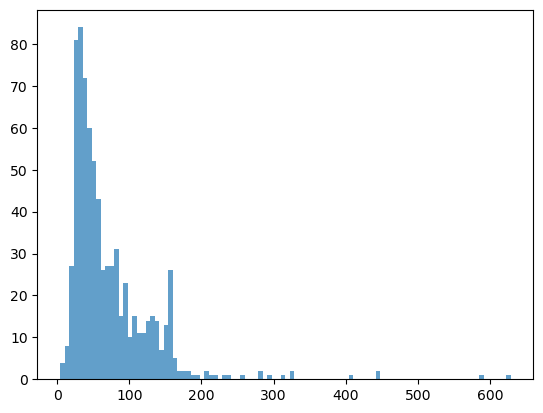

In [18]:
plt.hist(data[data['label']=='ham']['length'],bins=100, alpha=0.7)
plt.show()

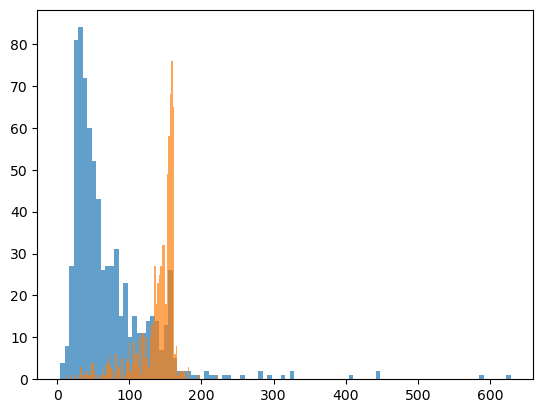

In [19]:
plt.hist(data[data['label']=='ham']['length'],bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100, alpha=0.7)
plt.show()

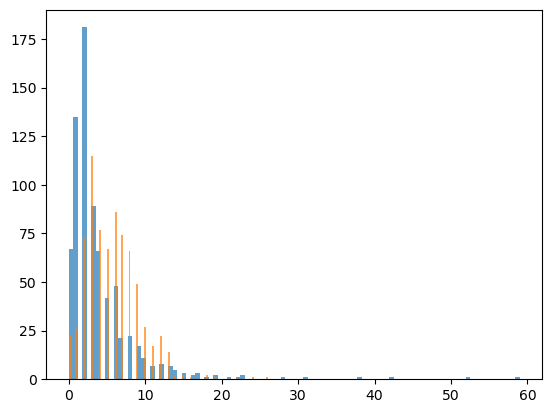

In [20]:
plt.hist(data[data['label']=='ham']['punct'],bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100, alpha=0.7)
plt.show()

# Split the data into train & test sets

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0, shuffle=True)

In [23]:
x_train

1438      You have 1 new message. Please call 08715205273
431     Set a place for me in your heart and not in yo...
194       Yar else i'll thk of all sorts of funny things.
240     i am seeking a lady in the street and a freak ...
1309    Had your mobile 11 months or more? U R entitle...
                              ...                        
763     Your free ringtone is waiting to be collected....
835     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216    Dorothy@kiefer.com (Bank of Granite issues Str...
559                          Good. No swimsuit allowed :)
684     1.20 that call cost. Which i guess isnt bad. M...
Name: message, Length: 1045, dtype: object

In [24]:
y_train

1438    spam
431      ham
194      ham
240      ham
1309    spam
        ... 
763     spam
835     spam
1216    spam
559      ham
684      ham
Name: label, Length: 1045, dtype: object

In [25]:
x_test

799     Ur cash-balance is currently 500 pounds - to m...
1047    FreeMsg: Hey - I'm Buffy. 25 and love to satis...
1436    TheMob>Hit the link to get a premium Pink Pant...
54                 Except theres a chick with huge boobs.
793     Think ur smart ? Win £200 this week in our wee...
                              ...                        
824     You will recieve your tone within the next 24h...
822     URGENT!: Your Mobile No. was awarded a £2,000 ...
644                           Super msg da:)nalla timing.
1034    Sexy Singles are waiting for you! Text your AG...
1356    Congrats! 2 mobile 3G Videophones R yours. cal...
Name: message, Length: 449, dtype: object

In [26]:
y_test

799     spam
1047    spam
1436    spam
54       ham
793     spam
        ... 
824     spam
822     spam
644      ham
1034    spam
1356    spam
Name: label, Length: 449, dtype: object

# Building the Model(Random Forest)

In [27]:
from sklearn.pipeline import Pipeline
#there will be a lot of repeated processses for training and testing the dataset seperately,
#to avoid that we are using pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [28]:
classifier = Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators=100))])

In [29]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

# Predicting the results (Random Forest)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
y_pred = classifier.predict(x_test)

In [32]:
#confusion_matrix
confusion_matrix(y_test, y_pred)

array([[226,   1],
       [ 24, 198]], dtype=int64)

In [33]:
#classification report
print(classification_report(y_test, y_pred))
# we are getting almost 95% accuracy

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       227
        spam       0.99      0.89      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [34]:
accuracy_score(y_test, y_pred)
# 94.5% accuracy

0.9443207126948775

In [35]:
# predoict a real message
classifier.predict(["Hello! You are learning natural language processing"])

array(['ham'], dtype=object)

In [36]:
classifier.predict(["Congratulations! you have became a millionaire overnight. Give your bankdetails to claim your money!"])

array(['ham'], dtype=object)